In [1]:
import pandas as pd

In [2]:
# our dataset is seperated by ';' for some reason
df = pd.read_csv('../data/raw/League of Legends Champion Stats 13.13.csv', delimiter=';')

In [3]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,71.25,-3.39,48.84%,92.28%,7.01%,5.81%,1.85
1,Ahri,Mage,MID,God,77.12,-5.03,50.90%,95.23%,10.63%,6.47%,2.63
2,Akali,Assassin,MID,A,55.37,-5.08,48.18%,78.45%,5.99%,8.10%,2.30
3,Akali,Assassin,TOP,C,36.35,-0.60,48.50%,20.39%,1.45%,8.10%,2.06
4,Akshan,Marksman,MID,B,47.25,-1.50,50.15%,69.32%,2.88%,5.94%,2.16
...,...,...,...,...,...,...,...,...,...,...,...
242,Zilean,Support,MID,A,52.02,4.90,53.91%,13.72%,0.31%,0.76%,3.52
243,Zilean,Support,SUPPORT,B,45.21,1.15,50.12%,82.08%,2.11%,0.76%,3.03
244,Zoe,Mage,MID,A,49.82,1.34,50.44%,86.34%,2.98%,1.93%,2.60
245,Zoe,Mage,SUPPORT,D,32.21,-1.45,48.67%,11.43%,0.40%,1.97%,2.11


# NOTE: data set was documented in the previous assignment

Now with pandas, I want to do some data visulizations on the 'Class' column and their mean win rates.

Second, I will be making a new Column for both the 'Class' column and the 'Role' column. This column will take each row's respective column, and calculate the ranking of win rate within the class/role. The name of these columns will be 'Class ranking' and 'Role ranking' 

Lastly, I will be doing data visulizations on the newly made 'Class ranking' column and plotting it with the win rates of each champion, too observe if there is a trend between the two items. I will also calculate the correlation of the two as well.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# convert strings (our numeric values are strings for some reason) to float.
df['Win %'] = df['Win %'].str.rstrip('%').astype(float)

Text(0.5, 1.0, 'Classes and Mean Win Rate')

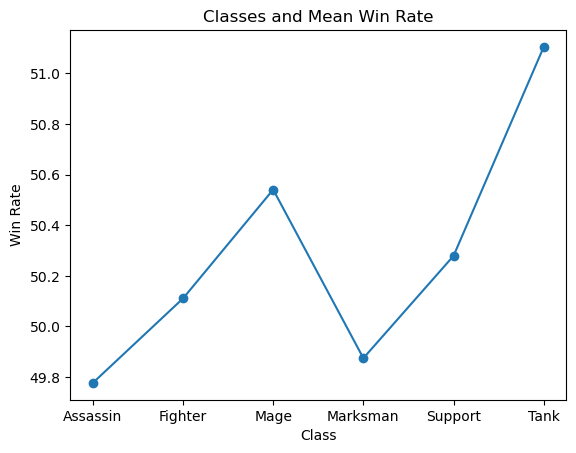

In [11]:
# get the unique classes 
unique_class = np.unique(np.array(df['Class']))
# calculate the mean
mean_win_rate = df.groupby('Class')['Win %'].mean()
# plot it
plt.plot(unique_class, mean_win_rate, marker = 'o')
plt.xlabel('Class')
plt.ylabel('Win Rate')
plt.title('Classes and Mean Win Rate')

In [15]:
# grouping by class and then making new column that ranks win % 
df['Class ranking'] = df.groupby('Class')['Win %'].rank(ascending=False, method='min')

In [17]:
# grouping by role and then making new column that ranks win % 
df['Role ranking'] = df.groupby('Role')['Win %'].rank(ascending=False, method='min')

In [18]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA,Class ranking,Role ranking
0,Aatrox,Fighter,TOP,God,71.25,-3.39,48.84,92.28%,7.01%,5.81%,1.85,57.0,51.0
1,Ahri,Mage,MID,God,77.12,-5.03,50.90,95.23%,10.63%,6.47%,2.63,26.0,27.0
2,Akali,Assassin,MID,A,55.37,-5.08,48.18,78.45%,5.99%,8.10%,2.30,23.0,59.0
3,Akali,Assassin,TOP,C,36.35,-0.60,48.50,20.39%,1.45%,8.10%,2.06,22.0,53.0
4,Akshan,Marksman,MID,B,47.25,-1.50,50.15,69.32%,2.88%,5.94%,2.16,19.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Zilean,Support,MID,A,52.02,4.90,53.91,13.72%,0.31%,0.76%,3.52,1.0,3.0
243,Zilean,Support,SUPPORT,B,45.21,1.15,50.12,82.08%,2.11%,0.76%,3.03,11.0,25.0
244,Zoe,Mage,MID,A,49.82,1.34,50.44,86.34%,2.98%,1.93%,2.60,39.0,39.0
245,Zoe,Mage,SUPPORT,D,32.21,-1.45,48.67,11.43%,0.40%,1.97%,2.11,56.0,36.0


Text(0.5, 1.0, 'Win% vs Class ranking')

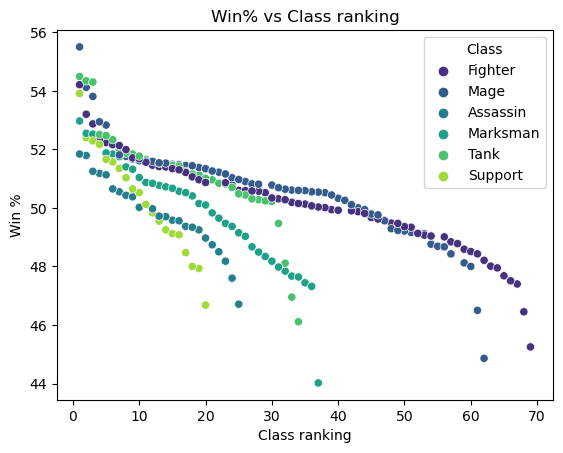

In [23]:
# plot them and distinct from Classes.
sns.scatterplot(data=df, x='Class ranking', y='Win %', hue='Class', palette='viridis')
plt.xlabel('Class ranking')
plt.ylabel('Win %')
plt.title('Win% vs Class ranking')

In [26]:
Class_Ranking_Win_correlation = df['Class ranking'].corr(df['Win %'])
print(Class_Ranking_Win_correlation)

-0.7238819036158354


It seems that the Support,Assassin, and Marksman class have the steepest slopes, while the Mage, Fighter, and Tank class have realitively smooth curves. 